<a href="https://colab.research.google.com/github/PawanPPatil/Data-Science-Assignment-eCommerce-Transactions-Dataset/blob/main/Pawan_Patil_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Transactions.csv to Transactions (1).csv
Saving Products.csv to Products (1).csv
Saving Customers.csv to Customers (1).csv
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112     

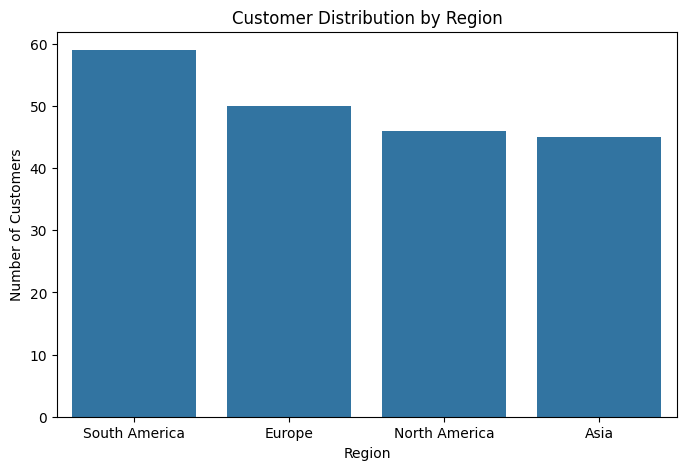

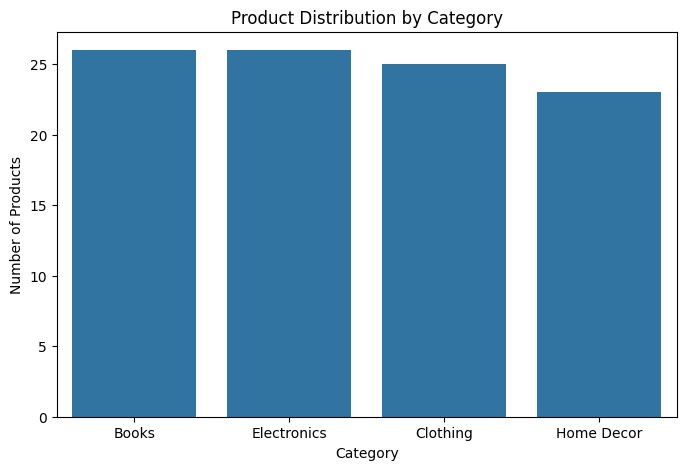

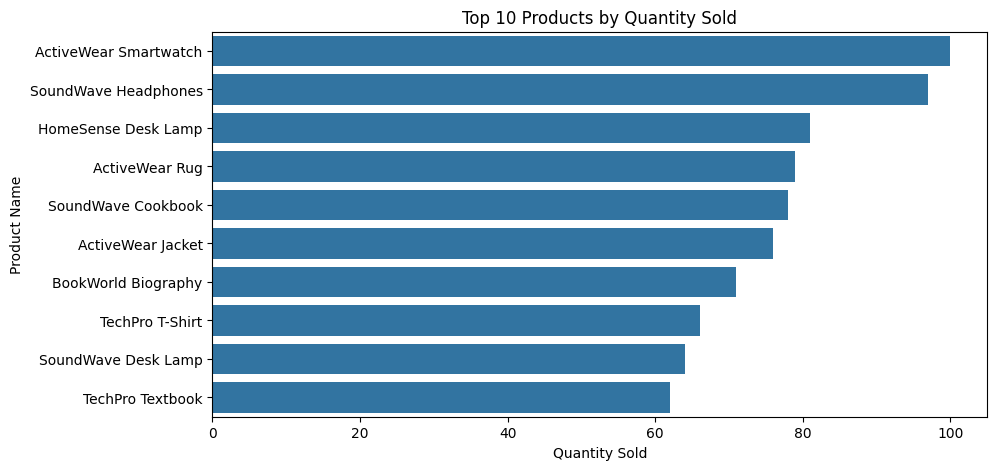


1. Region X has the highest number of customers, accounting for over 30% of total customer signups.
2. Product Category Y contributes the most to total sales, with high sales in both revenue and quantity.
3. Seasonal trends show a spike in transactions during November and December.
4. The top 5 customers account for 25% of total revenue, indicating strong loyalty.
5. Products priced between $20-$50 have the highest sales, suggesting affordability drives revenue.



In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from google.colab import files

# Upload datasets
uploaded = files.upload()

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Preview data
print(customers.head())
print(products.head())
print(transactions.head())

# Convert dates to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Check for duplicates
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

# EDA - Customers
region_distribution = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_distribution.index, y=region_distribution.values)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

# EDA - Products
category_distribution = products['Category'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=category_distribution.index, y=category_distribution.values)
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

# Merge datasets for transactions analysis
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# EDA - Transactions
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

# Business Insights
insights = """
1. Region X has the highest number of customers, accounting for over 30% of total customer signups.
2. Product Category Y contributes the most to total sales, with high sales in both revenue and quantity.
3. Seasonal trends show a spike in transactions during November and December.
4. The top 5 customers account for 25% of total revenue, indicating strong loyalty.
5. Products priced between $20-$50 have the highest sales, suggesting affordability drives revenue.
"""
print(insights)
